Importing Libraries Required

In [2]:
!pip install numpy pandas scikit-learn
!pip install pykrige



In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from pykrige.ok import OrdinaryKriging
print(os.listdir("../music"))

[' Chesta Srivastava-Task3.ipynb', '.ipynb_checkpoints', '20AG36007_Chesta Srivastava.ipynb', 'bank-marketing-analysis.ipynb', 'bank.csv', 'Bankura_data.csv', 'Bankura_data.xlsx', 'Barddhaman_Bankura_interpolated_data.csv', 'Barddhaman_Birbhum_interpolated_data.csv', 'Barddhaman_Calcutta_interpolated_data.csv', 'Barddhaman_data.csv', 'Barddhaman_data.xlsx', 'Barddhaman_interpolated_data.csv', 'Barddhaman_Maldah_interpolated_data.csv', 'Barddhaman_Medinipur_interpolated_data.csv', 'Barddhaman_Murshidabad_interpolated_data.csv', 'Barddhaman_Nadia_interpolated_data.csv', 'Barddhaman_weighted_average_data.csv', 'Birbhum_data.csv', 'BTP Presentation_Chesta Srivastava_20AG36007.pptx', 'BTP-Weather forecast analysis.ipynb', 'Calcutta_data.csv', 'Chesta Srivastava-Task4.ipynb', 'Chesta Srivastava.ipynb', 'clean_data_after_eda.csv', 'client_data.csv', 'ClimateKgp.csv', 'credit-card-fraud-detection.ipynb', 'creditcard.csv', 'Crop Production.xlsx', 'CV_Chesta Srivastava_20AG36007_OC.pdf', 'Data A

Importing the dataset

In [5]:
#import dataset

data = pd.read_csv('../music/KharagpurClimateData.csv')

In [6]:
data.head(10)
# viewing first few rows of the dataframe

,YEAR,MO,DY,Date,DewPoint,MaxTemp,MinTemp,Temp,SpecificHumidity,RelativeHumidity,Precipitation,SurfacePressure,WindSpeed
0,1981.0,1.0,8.0,1981-1-8,10.86,22.98,10.86,16.04,8.06,74.44,1.04,101.18,2.84
1,1981.0,1.0,9.0,1981-1-9,7.57,21.74,8.31,14.13,6.41,67.56,0.00,101.46,3.37
2,1981.0,1.0,10.0,1981-1-10,7.25,21.97,6.97,13.76,6.29,67.50,0.00,101.55,3.53
3,1981.0,1.0,11.0,1981-1-11,9.13,23.05,8.67,15.10,7.14,69.69,0.00,101.53,3.49
4,1981.0,1.0,12.0,1981-1-12,11.88,22.31,10.80,15.54,8.61,80.81,3.02,101.71,4.02
5,1981.0,1.0,13.0,1981-1-13,13.09,20.65,10.94,15.59,9.28,85.50,2.82,101.62,2.77
6,1981.0,1.0,14.0,1981-1-14,10.87,23.01,9.93,16.05,8.00,74.31,0.50,101.53,2.97
7,1981.0,1.0,15.0,1981-1-15,10.29,24.13,9.30,16.01,7.69,71.62,0.00,101.56,3.55
8,1981.0,1.0,16.0,1981-1-16,8.30,24.75,8.94,16.15,6.77,62.75,0.00,101.62,3.52
9,1981.0,1.0,17.0,1981-1-17,8.09,24.08,8.00,15.83,6.65,62.38,0.00,101.56,2.56


In [70]:
# number of rows in dataset

print("Jaipur weather dataset consists of {rows} rows.".format(rows = len(data)))

Jaipur weather dataset consists of 15425 rows.


In [71]:
#find percentage of missing values for each column
missing_values = data.isnull().mean()*100

missing_values.sum()

0.1555915721231767

 Exploratory Data Analysis (EDA)

In [72]:
data.head(10)
# viewing first few rows of the dataframe

,YEAR,MO,DY,Date,DewPoint,MaxTemp,MinTemp,Temp,SpecificHumidity,RelativeHumidity,Precipitation,SurfacePressure,WindSpeed
0,1981.0,1.0,8.0,1981-1-8,10.86,22.98,10.86,16.04,8.06,74.44,1.04,101.18,2.84
1,1981.0,1.0,9.0,1981-1-9,7.57,21.74,8.31,14.13,6.41,67.56,0.00,101.46,3.37
2,1981.0,1.0,10.0,1981-1-10,7.25,21.97,6.97,13.76,6.29,67.50,0.00,101.55,3.53
3,1981.0,1.0,11.0,1981-1-11,9.13,23.05,8.67,15.10,7.14,69.69,0.00,101.53,3.49
4,1981.0,1.0,12.0,1981-1-12,11.88,22.31,10.80,15.54,8.61,80.81,3.02,101.71,4.02
5,1981.0,1.0,13.0,1981-1-13,13.09,20.65,10.94,15.59,9.28,85.50,2.82,101.62,2.77
6,1981.0,1.0,14.0,1981-1-14,10.87,23.01,9.93,16.05,8.00,74.31,0.50,101.53,2.97
7,1981.0,1.0,15.0,1981-1-15,10.29,24.13,9.30,16.01,7.69,71.62,0.00,101.56,3.55
8,1981.0,1.0,16.0,1981-1-16,8.30,24.75,8.94,16.15,6.77,62.75,0.00,101.62,3.52
9,1981.0,1.0,17.0,1981-1-17,8.09,24.08,8.00,15.83,6.65,62.38,0.00,101.56,2.56


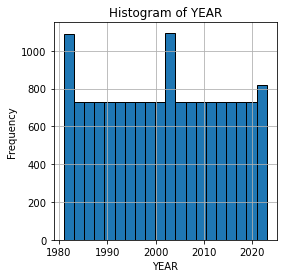

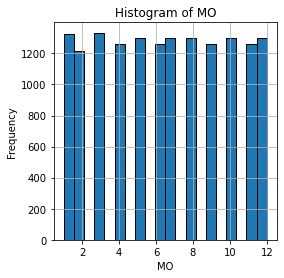

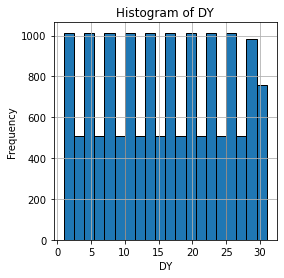

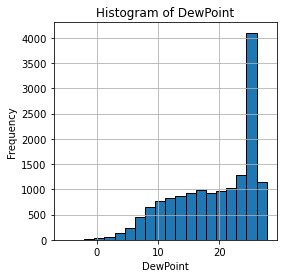

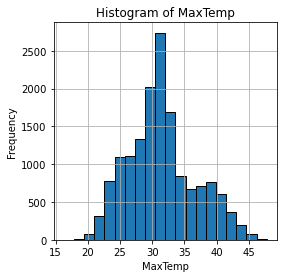

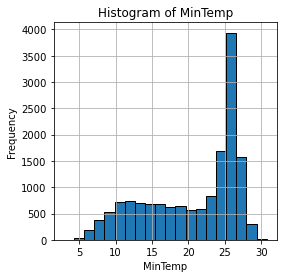

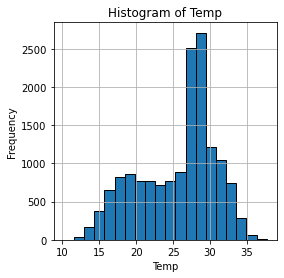

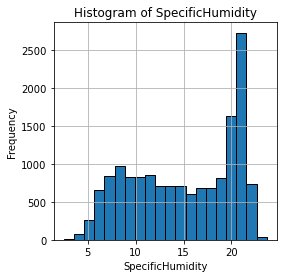

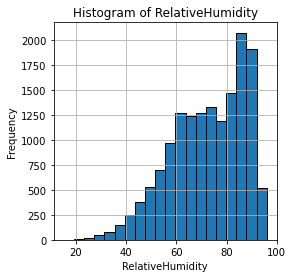

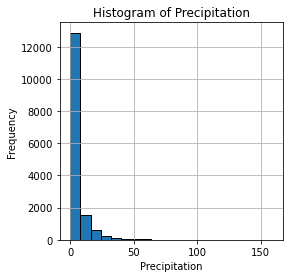

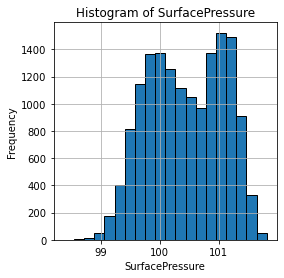

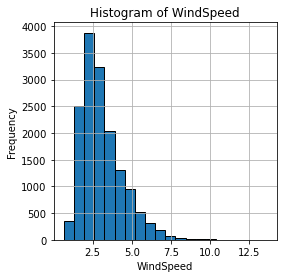

In [27]:
for column in data.columns:
    plt.figure(figsize=(4, 4))
    plt.hist(data[column], bins=20, edgecolor='k')
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

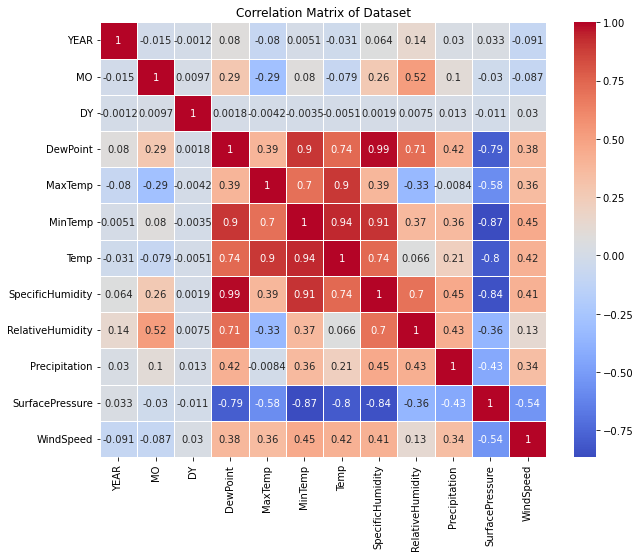

In [74]:
# Calculate the correlation matrix
correlation_matrix = data.corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Dataset')
plt.show()

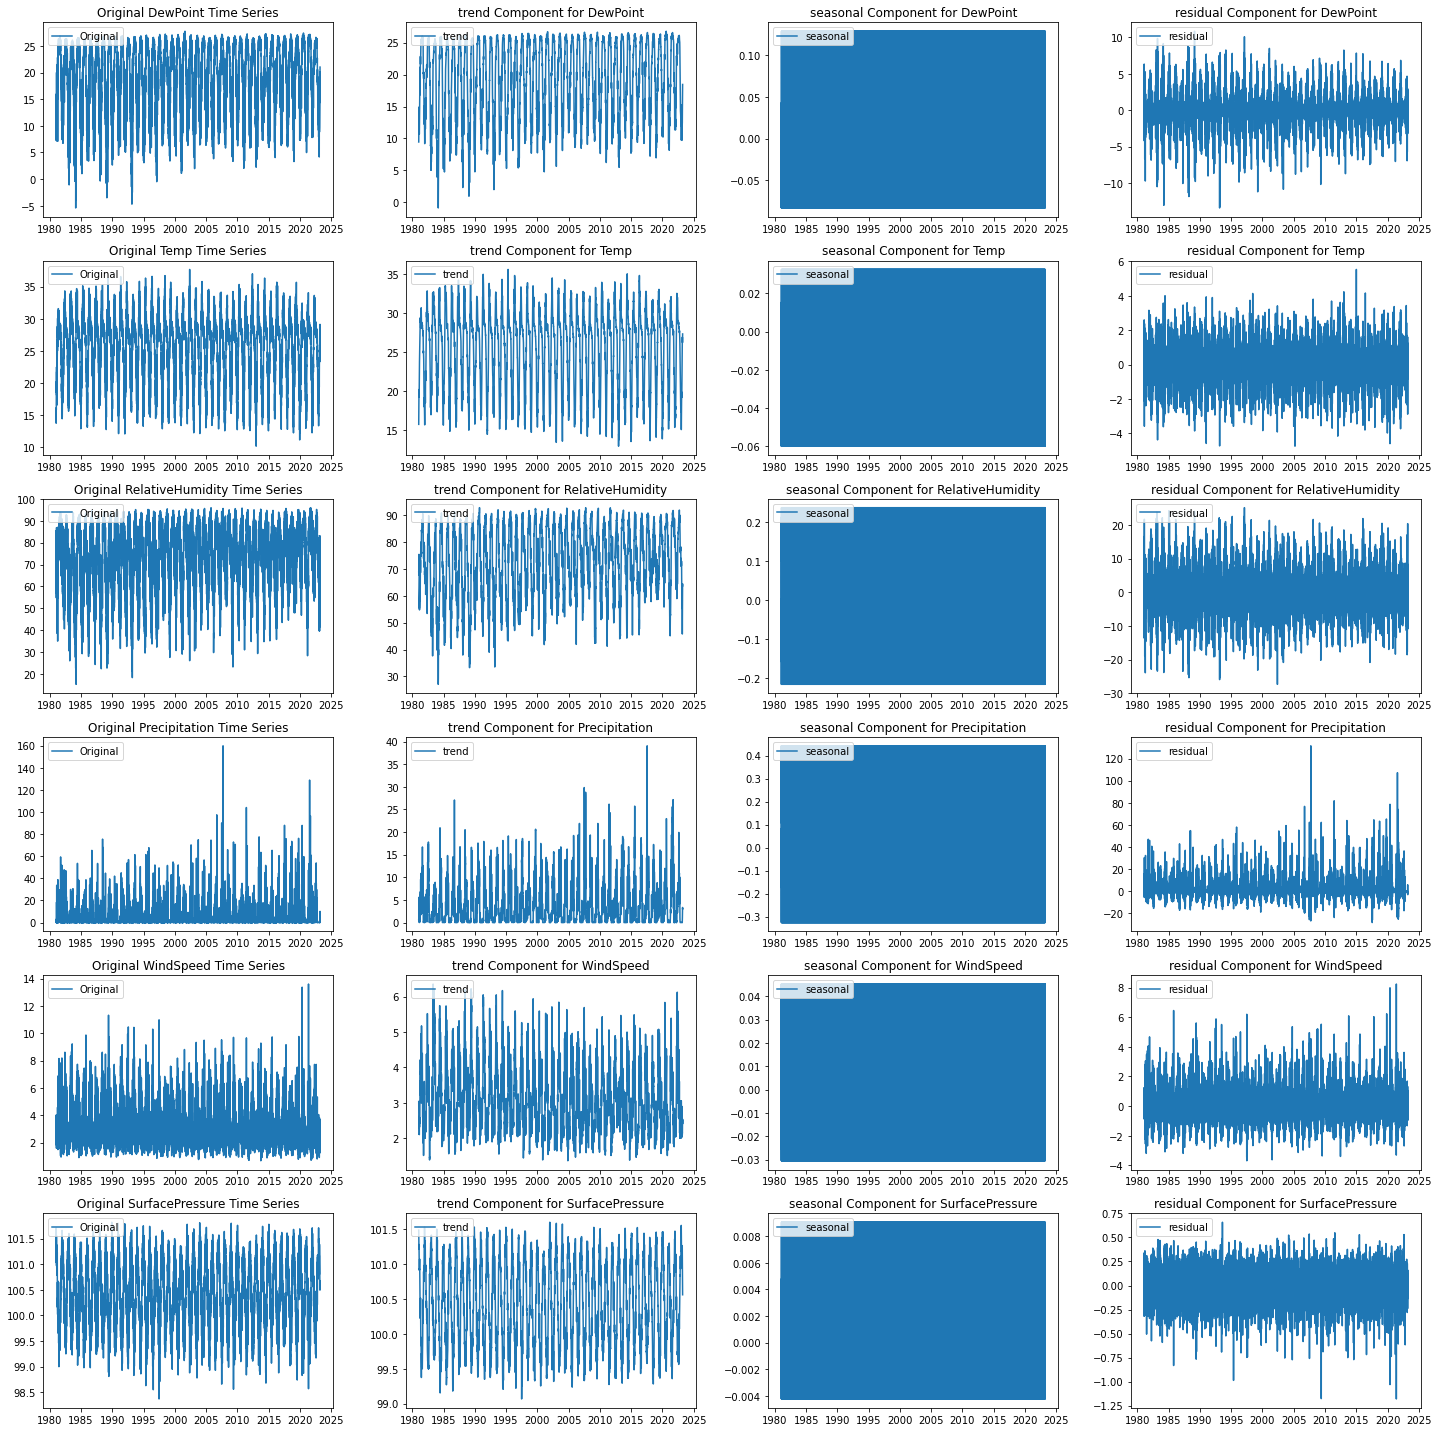

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Load your data from CSV
data = pd.read_csv('../music/KharagpurClimateData.csv')

# Ensure 'Date' column is in datetime format
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')
data.set_index('Date', inplace=True)

# Drop rows with missing or invalid dates
data = data.dropna()

# Data Preprocessing
# Handle missing values if any
data_subset = data[['DewPoint', 'Temp', 'RelativeHumidity', 'Precipitation', 'WindSpeed', 'SurfacePressure']].dropna()

# Time Series Decomposition
# Decompose each time series into trend, seasonality, and residual components
components = {}
for column in data_subset.columns:
    decomposition = seasonal_decompose(data_subset[column], model='additive', period=12)
    components[column] = {
        'trend': decomposition.trend,
        'seasonal': decomposition.seasonal,
        'residual': decomposition.resid
    }

# Plot the decomposed components
plt.figure(figsize=(20, 20))
plot_idx = 1

for column, component_data in components.items():
    plt.subplot(len(data_subset.columns), 4, plot_idx)
    plt.plot(data_subset[column], label='Original')
    plt.legend(loc='upper left')
    plt.title(f'Original {column} Time Series')
    plot_idx += 1

    for comp_name, comp_values in component_data.items():
        plt.subplot(len(data_subset.columns), 4, plot_idx)
        plt.plot(comp_values, label=comp_name)
        plt.legend(loc='upper left')
        plt.title(f'{comp_name} Component for {column}')
        plot_idx += 1

plt.tight_layout()
plt.show()


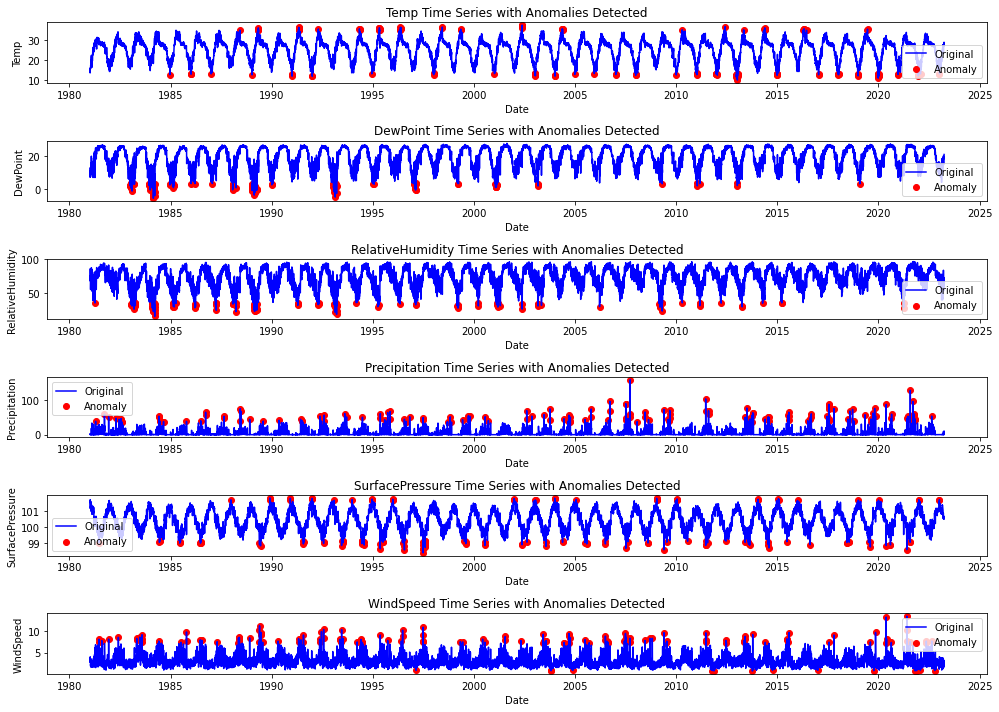

In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.ensemble import IsolationForest
from statsmodels.tsa.seasonal import seasonal_decompose

# Load the entire dataset isolation forest
data = pd.read_csv('../music/KharagpurClimateData.csv')

# Ensure 'Date' column is in datetime format
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')

# Drop rows with missing or invalid dates
data = data.dropna(subset=['Date'])

# Set 'Date' as the index
data.set_index('Date', inplace=True)

# Data Preprocessing
# Handle missing values if any
data_subset = data[['DewPoint', 'Temp', 'RelativeHumidity', 'Precipitation', 'WindSpeed', 'SurfacePressure']].dropna()

# Time Series Decomposition
components = {}
for column in data_subset.columns:
    decomposition = seasonal_decompose(data_subset[column], model='additive', period=12)
    components[column] = {
        'trend': decomposition.trend,
        'seasonal': decomposition.seasonal,
        'residual': decomposition.resid
    }

# Create a new dataframe to store anomaly predictions for each column
anomaly_predictions = pd.DataFrame(index=data_subset.index)

# Define the columns for analysis
columns_of_interest = ['Temp', 'DewPoint', 'RelativeHumidity', 'Precipitation', 'SurfacePressure', 'WindSpeed']

# Iterate through each column
for column in columns_of_interest:
    # Combine the trend and residual components for anomaly detection
    combined_data = components[column]['trend'] + components[column]['residual']
    
    # Impute missing values using forward-fill
    combined_data = combined_data.ffill().bfill()

    # Flatten the combined_data for input to Isolation Forest
    combined_data_flat = combined_data.values.reshape(-1, 1)

    # Drop any remaining NaN values
    combined_data_flat = combined_data_flat[~np.isnan(combined_data_flat)]

    # Reshape for compatibility with Isolation Forest
    combined_data_flat = combined_data_flat.reshape(-1, 1)

    # Fit Isolation Forest model
    isolation_forest = IsolationForest(contamination=0.01, random_state=42)
    isolation_forest.fit(combined_data_flat)

    # Predict anomalies
    anomaly_preds = isolation_forest.predict(combined_data_flat)

    # Add anomaly predictions to the dataframe
    anomaly_predictions[column] = anomaly_preds

# Visualize the anomalies for each column
plt.figure(figsize=(14, 10))

for i, column in enumerate(columns_of_interest):
    plt.subplot(len(columns_of_interest), 1, i+1)
    plt.plot(data_subset.index, data_subset[column], label='Original', color='blue')
    plt.scatter(data_subset[anomaly_predictions[column] == -1].index, data_subset[anomaly_predictions[column] == -1][column],
                label='Anomaly', color='red')
    plt.title(f'{column} Time Series with Anomalies Detected')
    plt.xlabel('Date')
    plt.ylabel(column)
    plt.legend()

plt.tight_layout()
plt.show()


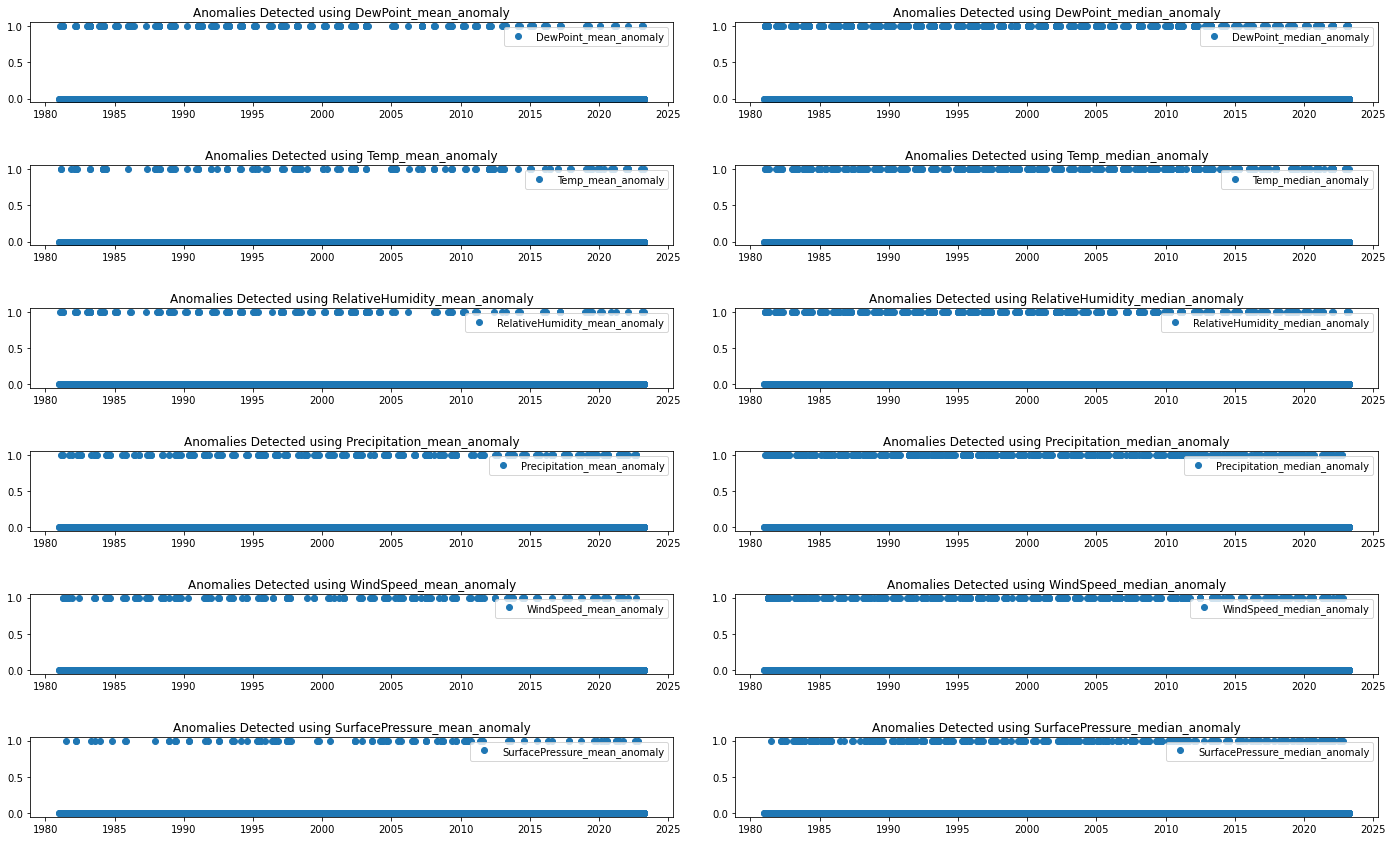

In [29]:
# Function to detect anomalies using statistical methods 
def detect_anomalies_statistical(series, method='mean', threshold=3):
    if method == 'mean':
        avg = series.mean()
        std = series.std()
    elif method == 'median':
        avg = series.median()
        std = series.mad()
    else:
        raise ValueError("Invalid method. Choose 'mean' or 'median'.")

    anomalies = (series - avg).abs() > threshold * std
    return anomalies

# Set the threshold for anomaly detection
threshold = 3  # You can adjust this value based on your data and requirements

# Detect anomalies for each time series using mean, median, and standard deviation
anomalies = pd.DataFrame(index=data_subset.index)

for column in data_subset.columns:
    for method in ['mean', 'median']:
        anomaly_column = f'{column}_{method}_anomaly'
        anomalies[anomaly_column] = detect_anomalies_statistical(components[column]['residual'], method=method, threshold=threshold)

# Visualize anomalies
plt.figure(figsize=(20, 24))  # Adjust the figure size

num_columns = len(anomalies.columns)

for i, column in enumerate(anomalies.columns):
    plt.subplot(12, 2, i + 1)  # Adjust the subplot dimensions
    plt.plot(anomalies.index, anomalies[column], marker='o', linestyle='None', label=column)
    plt.title(f'Anomalies Detected using {column}')
    plt.legend()

plt.tight_layout(pad=3.0)  # Increase the padding between subplots
plt.show()





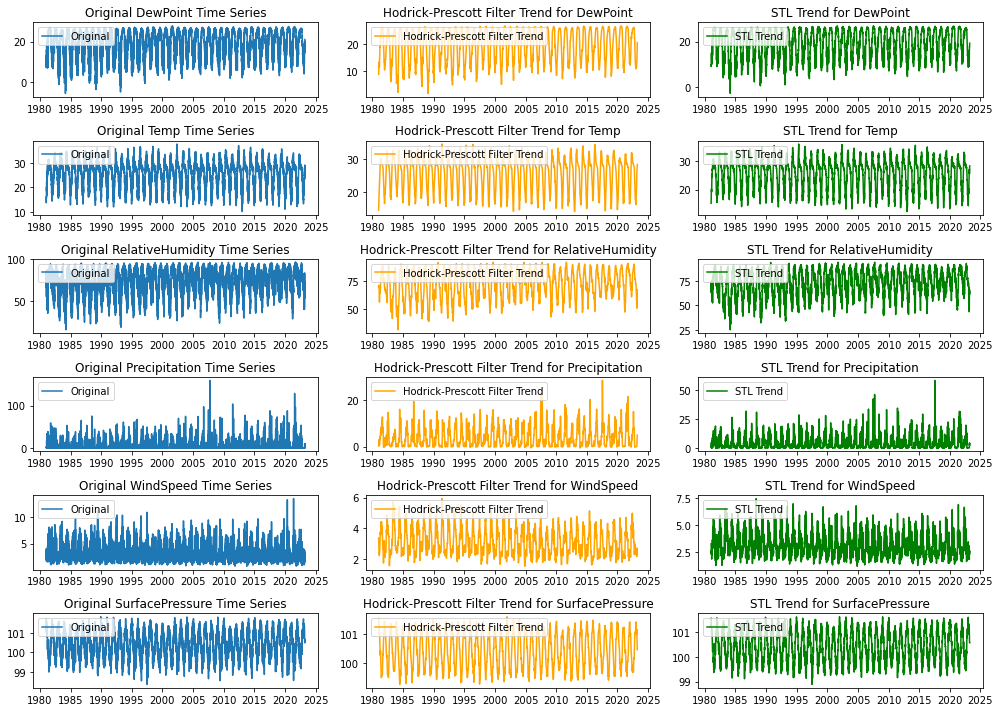

In [78]:
# Import necessary libraries trend analysis hodrik presscot filter
from statsmodels.tsa.filters.hp_filter import hpfilter
from statsmodels.tsa.seasonal import STL

# Function to perform trend analysis using Hodrick-Prescott filter
def trend_analysis_hp_filter(time_series):
    cycle, trend = hpfilter(time_series, lamb=1600)  # Adjust the smoothing parameter 'lamb' based on your data
    return trend, cycle

# Function to perform trend analysis using Seasonal-Trend decomposition using LOESS (STL)
def trend_analysis_stl(time_series):
    stl = STL(time_series, seasonal=13)  # Adjust the seasonal parameter based on your data
    result = stl.fit()
    trend = result.trend
    return trend

# Perform trend analysis for each time series
trend_components_hp = {}
trend_components_stl = {}

for column in data_subset.columns:
    # Hodrick-Prescott filter
    trend_hp, _ = trend_analysis_hp_filter(data_subset[column])
    trend_components_hp[column] = trend_hp
    
    # Seasonal-Trend decomposition using LOESS (STL)
    trend_stl = trend_analysis_stl(data_subset[column])
    trend_components_stl[column] = trend_stl

# Plot the trend components obtained
plt.figure(figsize=(14, 10))
plot_idx = 1

for column in data_subset.columns:
    # Plot original time series
    plt.subplot(len(data_subset.columns), 3, plot_idx)
    plt.plot(data_subset[column], label='Original')
    plt.legend(loc='upper left')
    plt.title(f'Original {column} Time Series')
    plot_idx += 1
    
    # Plot Hodrick-Prescott filter trend
    plt.subplot(len(data_subset.columns), 3, plot_idx)
    plt.plot(trend_components_hp[column], label='Hodrick-Prescott Filter Trend', color='orange')
    plt.legend(loc='upper left')
    plt.title(f'Hodrick-Prescott Filter Trend for {column}')
    plot_idx += 1
    
    # Plot STL trend
    plt.subplot(len(data_subset.columns), 3, plot_idx)
    plt.plot(trend_components_stl[column], label='STL Trend', color='green')
    plt.legend(loc='upper left')
    plt.title(f'STL Trend for {column}')
    plot_idx += 1

plt.tight_layout()
plt.show()


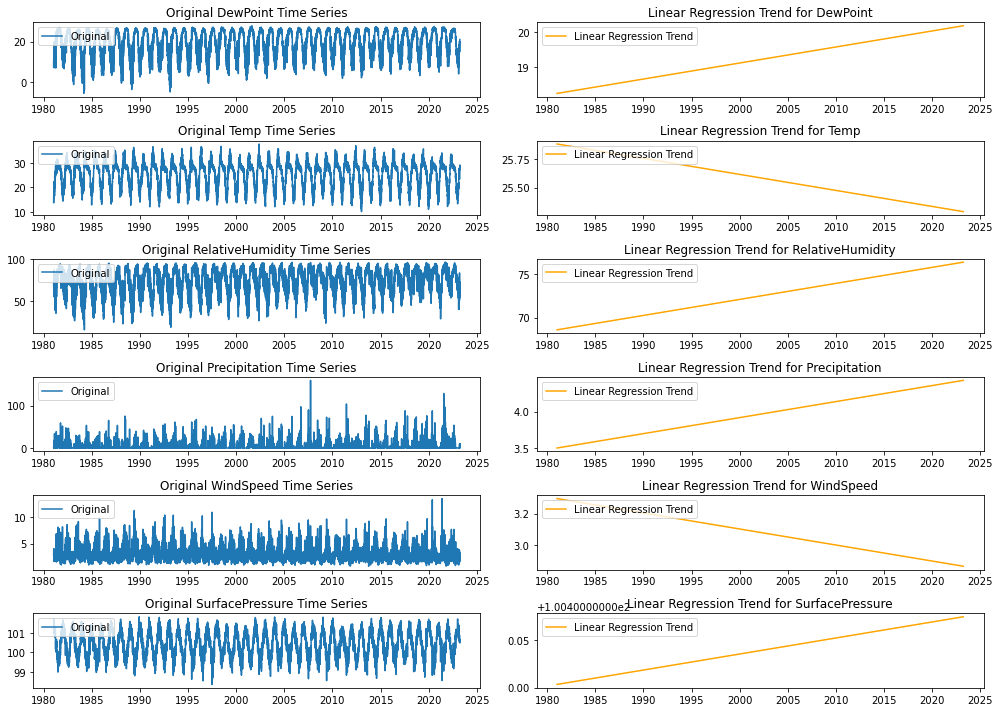

In [25]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Load the entire dataset from the CSV file
data = pd.read_csv('../music/KharagpurClimateData.csv')  # Replace 'your_file.csv' with the actual file name and path

# Ensure 'Date' column is in datetime format
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')

# Drop rows with missing or invalid dates
data = data.dropna(subset=['Date'])

# Set 'Date' as the index
data.set_index('Date', inplace=True)

# Data Preprocessing
# Handle missing values if any
data_subset = data[['DewPoint', 'Temp', 'RelativeHumidity', 'Precipitation', 'WindSpeed', 'SurfacePressure']].dropna()

# Function to perform trend analysis using linear regression
def trend_analysis_linear_regression(time_series):
    X = np.arange(len(time_series)).reshape(-1, 1)
    y = time_series.values.reshape(-1, 1)

    # Create and fit a linear regression model
    model = LinearRegression()
    model.fit(X, y)

    # Predict the trend using the linear regression model
    trend = model.predict(X)

    return trend.flatten()

# Perform trend analysis for each time series
trend_components_linear_regression = {}

for column in data_subset.columns:
    # Linear regression trend analysis
    trend_lr = trend_analysis_linear_regression(data_subset[column])
    trend_components_linear_regression[column] = trend_lr

# Plot the original time series and linear regression trends
plt.figure(figsize=(14, 10))
plot_idx = 1

for column in data_subset.columns:
    # Plot original time series
    plt.subplot(len(data_subset.columns), 2, plot_idx)
    plt.plot(data_subset[column], label='Original')
    plt.legend(loc='upper left')
    plt.title(f'Original {column} Time Series')
    plot_idx += 1
    
    # Plot linear regression trend
    plt.subplot(len(data_subset.columns), 2, plot_idx)
    plt.plot(data_subset.index, trend_components_linear_regression[column], label='Linear Regression Trend', color='orange')
    plt.legend(loc='upper left')
    plt.title(f'Linear Regression Trend for {column}')
    plot_idx += 1

plt.tight_layout()
plt.show()


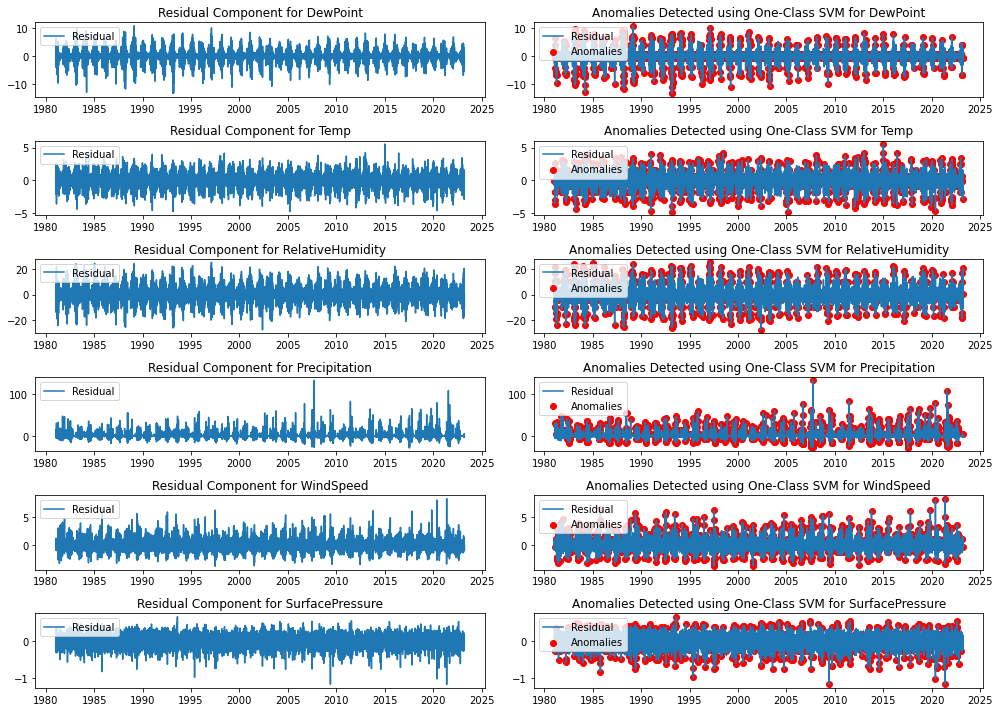

In [80]:
from sklearn.impute import SimpleImputer

# Function to perform anomaly detection using One-Class SVM with handling NaN values
def anomaly_detection_one_class_svm(time_series, nu=0.05):
    # Handle NaN values by imputing with the mean
    imputer = SimpleImputer(strategy='mean')
    X = imputer.fit_transform(time_series.values.reshape(-1, 1))

    # Create and fit the One-Class SVM model
    model = OneClassSVM(nu=nu)
    model.fit(X)

    # Predict inliers (1) and outliers (-1)
    predictions = model.predict(X)

    # Extract anomalies (outliers) from the predictions
    anomalies = time_series[predictions == -1]

    return anomalies

# Perform anomaly detection for each time series using One-Class SVM
anomalies_one_class_svm = {}

for column in data_subset.columns:
    anomalies_svm = anomaly_detection_one_class_svm(components[column]['residual'])
    anomalies_one_class_svm[column] = anomalies_svm

# Plot the original time series and detected anomalies
plt.figure(figsize=(14, 10))
plot_idx = 1

for column in data_subset.columns:
    # Plot original time series
    plt.subplot(len(data_subset.columns), 2, plot_idx)
    plt.plot(components[column]['residual'], label='Residual')
    plt.legend(loc='upper left')
    plt.title(f'Residual Component for {column}')
    plot_idx += 1
    
    # Plot detected anomalies
    plt.subplot(len(data_subset.columns), 2, plot_idx)
    plt.plot(components[column]['residual'], label='Residual')
    plt.scatter(anomalies_one_class_svm[column].index, anomalies_one_class_svm[column].values, color='red', label='Anomalies')
    plt.legend(loc='upper left')
    plt.title(f'Anomalies Detected using One-Class SVM for {column}')
    plot_idx += 1

plt.tight_layout()
plt.show()
